## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

<img src = 'https://sun9-73.userapi.com/impg/m1XAJCxnH7nkLPhKoj4VjqCUit6GKUFLNxfURw/F9Tn_ZtRycA.jpg?size=744x794&quality=95&sign=7053ca76d934f3c83525a39b14866960&type=album' width = 400>

<img src = 'https://sun9-66.userapi.com/impg/aHZcqID-Fr62Gz--ePCXk8MEtJzGXEAlI6Svvw/V85249EzKPE.jpg?size=746x748&quality=95&sign=d2af4b6ce5de5386db53d08df3b992d6&type=album' width = 400>

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

Пропусков в таблице Х нет. Категориальных переменных нет

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3,random_state= 42, stratify=y)

Параметр stratify устанавливаем по таргету у, он нужен, чтобы сохранить пропорции классов при разбиении датасета

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler() # масштабируем признаки
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [ ]:
columns_needed = ['magnesium','alcohol']    # выбираем только нужные колонки
neighbors = [1, 3, 5, 10, 15, 25]

In [ ]:
def knn(X_df, y_df):                        # на ввод подается X_df - таблица для предсказания и y_df - для проверки точности
  mass, classifiers= list(), list()         # в списки собираю результаты работы и классификаторы
  for k in neighbors:
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train[columns_needed].values, y_train)     # в фит передаю массивы без названий признаков, иначе на графиках будут вылезать предупреждения
    y_pred = clf.predict(X_df[columns_needed].values)    # делаем предикт
    classifiers.append(clf)                   # заносим классификаторы в список
    mass.append(np.mean(y_pred == y_df))      # заносим точность в список
  return mass, classifiers

In [ ]:
accuracy_train, classifier_train = knn(X_train, y_train)      # вызываем функцию выше для оценик трейн и тест
accuracy_test, classifier_test = knn(X_test, y_test)

table = np.column_stack((neighbors, accuracy_train, accuracy_test))       # все в табличку вставляем
table = pd.DataFrame(table, columns = ['Knn_number', 'Train', 'Test'])
table['Knn_number'] = table['Knn_number'].astype(int)
table

,Knn_number,Train,Test
0,1,1.000000,0.555556
1,3,0.798387,0.629630
2,5,0.782258,0.629630
3,10,0.750000,0.648148
4,15,0.717742,0.629630
5,25,0.693548,0.685185


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

Осторожно! График загружается 6-7 минут

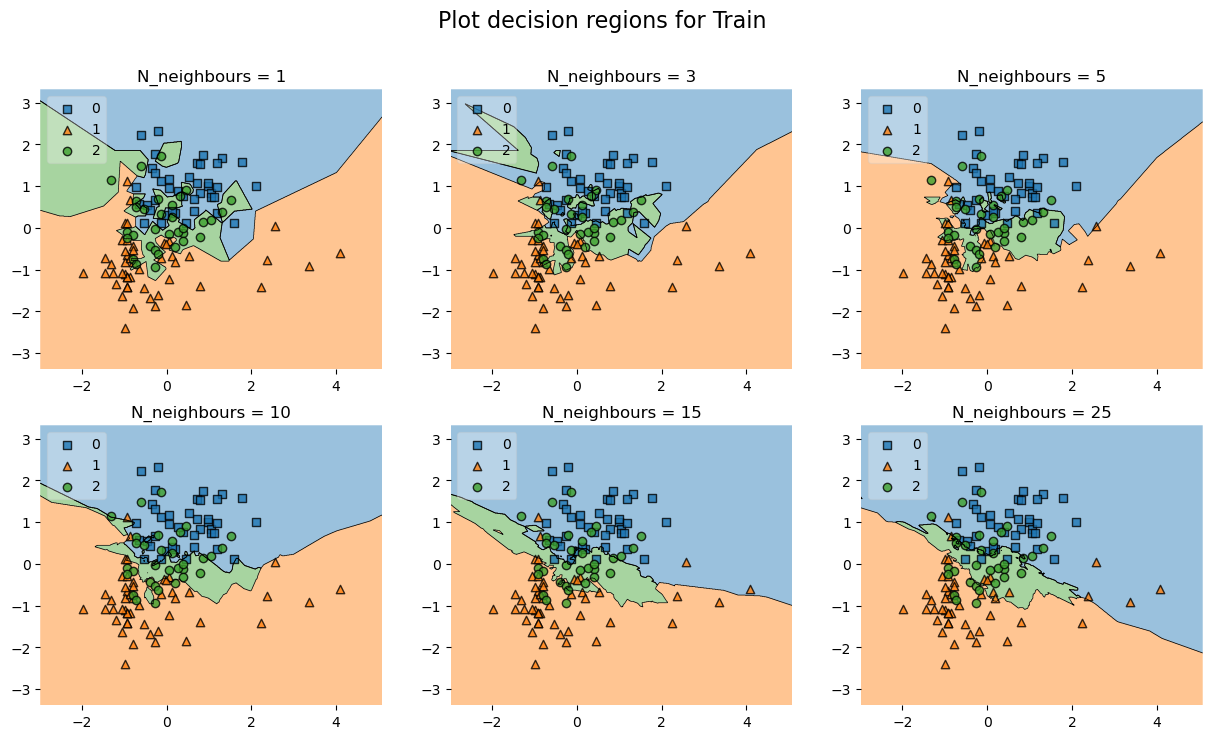

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# список меток
labels = ['N_neighbours = 1', 'N_neighbours = 3', 'N_neighbours = 5', 'N_neighbours = 10', 'N_neighbours = 15', 'N_neighbours = 25']

# строим графики по сохраненным классификаторам
for clf, lab, ax in zip(classifier_train, labels, itertools.product(range(2), range(3))):
  plot_decision_regions(X_train[columns_needed].values, y_train, clf, legend=2, ax=axes[ax[0], ax[1]])
  axes[ax[0], ax[1]].set_title(lab)

fig.suptitle('Plot decision regions for Train', fontsize=16)
plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

In [ ]:
table    # наши результаты на трейне выглядят вот так в пункте 1.3, random_state = 42

,Knn_number,Train,Test
0,1,1.000000,0.555556
1,3,0.798387,0.629630
2,5,0.782258,0.629630
3,10,0.750000,0.648148
4,15,0.717742,0.629630
5,25,0.693548,0.685185


В глаза бросается точность на тесте при к = 25, но это просто особенность фиксированного ядра (42), на практике стабильно максимальных значений при большом количестве соседей не было выявлено. Число к от 5 до 10 выглядит оптимальным с точки зрения результатов на обучающей и тестовой выборках. Посмотрим на ситуацию на графиках:

k = 1: выделяется зона для каждой точки, зеленая поверхность выглядит грустно и ободранно, высшая точность на трейне и так себе результат на других данных, диагностируем переобучение

k = 3: коварно вылезают странные области, модель все еще подстраивается под одиноко стоящие наблюдения

k = 5: уже лучше

k = 10: здесь максимум точности на тесте, на трейне тоже все прилично

Далее c увеличением количества соседей будем терять качество модели. Стоит детальнее рассмотреть к в интервале 5-10, там работает лучше всего для тестовой выборки, а потеря качества на трейне не выглядит большой


### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

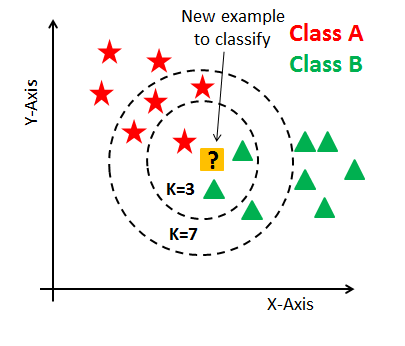

In [ ]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k): # в конструкторе объвляем селфы
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y): # сохраняем полученные таблицы в атрибуты self.X_train и self.y_train
        self.X_train = X
        self.y_train = y

    def predict(self, X_test): # в аргумент принимаем таблицу, для которой хотим сделать прогноз
        y_pred = np.apply_along_axis(self.count_distance, 1, X_test) # построчно применяем функцию count_distance, она ниже
        return np.array(y_pred)

    def count_distance(self, x):
        distances = np.sqrt(np.sum((self.X_train - x)**2, axis=1)) # считаем расстояние точки из X_test и всех точек X.train
        k_indices = np.argsort(distances)[:self.k] # сортируем по близости и отрезаем количество k, получили индексы
        k_nearest_labels = np.take(self.y_train, k_indices) # по индексам возвращаем классы ближайших точек
        most_common = Counter(k_nearest_labels).most_common(1) # выбираем одну самую популярную, но тут кортеж
        return most_common[0][0] # раскрываем кортеж и достаем присвоенный класс для точки из X_test

In [ ]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

<img src = 'https://sun9-74.userapi.com/impg/bkO8nsmJu6ftmGOAW2WGf70LeoqGdbZ8vjRXoQ/d9fi3UBzP8s.jpg?size=828x821&quality=95&sign=b51b741886b5212645646c84a5720388&type=album![image-2.png](attachment:image-2.png)' width = 500>

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
data = pd.read_csv('/Users/syuy/Downloads/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True) # это явно лишнее

Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Пустых значений нет, ураа. Лишний столбец с индексами удалила

**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [ ]:
float_columns = data.select_dtypes(include=['float']).join(data[['price']])
pd.DataFrame(float_columns.corrwith(data['price']), columns = ['corr with price']).T

,carat,depth,table,x,y,z,price
corr with price,0.921591,-0.010647,0.127134,0.884435,0.865421,0.861249,1.0


In [ ]:
data.corr(numeric_only=True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [ ]:
category_columns = data.select_dtypes(include = ['object']).columns
category_columns # будем кодировать 3 столбца

Index(['cut', 'color', 'clarity'], dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder(sparse_output=False, drop='first') # убираем первую строку для каждой колонки
encoded_cols = pd.DataFrame(onehotencoder.fit_transform(data[category_columns])) # закодировали 3 штуки
feature_names = onehotencoder.get_feature_names_out(category_columns) # вытаскиваем новые названия колонок
encoded_cols.columns = feature_names # присвоили названия колонок закодированной таблице

final_data = data.join(encoded_cols) # объединяем с начальной версией таблицы
final_data.drop(category_columns, axis = 1, inplace = True) # убираем старые 3 колонки
final_data

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [ ]:
X = final_data.drop(['price'], axis=1)
y = final_data['price'] # достаем колонку таргет

В таблице 53940 наблюдений по алмазам, где ответ "цена" - вещественное число, нет смысла использовать stratify, ну или как вариант разбить на отрезки и сгруппировать цены по данным диапазонам, образец кода закомментирован, дальше я не буду его использовать.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# min = np.amin(y)
# max = np.amax(y)

# bins     = np.linspace(start=min, stop=max, num=50)
# y_binned = np.digitize(y, bins, right=True)

# X_train, X_test, y_train, y_test = train_test_split(
#     X,
#     y,  test_size=0.3,random_state= 42,
#     stratify=y_binned)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state= 42)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [ ]:
from sklearn.preprocessing import StandardScaler

Масштабируем только колонки с непрерывными признаками, новенькие закодированные столбцы не трогаем


In [ ]:
scaler = StandardScaler().fit(X_train.iloc[:, 0:6])
X_train.iloc[:,0:6] = scaler.transform(X_train.iloc[:,0:6])
X_test.iloc[:,0:6] = scaler.transform(X_test.iloc[:,0:6])
X_train

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
19497,0.862659,-0.311437,-0.207099,1.055581,0.986556,0.968253,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31229,-1.029889,0.178549,-0.656213,-1.207734,-1.202544,-1.168276,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22311,0.862659,0.458541,-0.207099,0.904099,0.951670,0.982309,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
278,0.021527,0.598537,-1.105327,0.164512,0.192898,0.251391,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6646,-0.020530,-0.031445,-0.656213,0.182333,0.184176,0.181110,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.526206,0.458541,0.691128,0.663511,0.672581,0.715243,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
44732,-0.693436,-0.521432,-1.105327,-0.628540,-0.635646,-0.676312,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
38158,-0.987832,-1.011418,0.242014,-1.109717,-1.115329,-1.182333,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.210782,0.738533,0.691128,0.351636,0.253949,0.391952,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
np.set_printoptions(suppress=True) # уберу экспоненциальную запись

In [ ]:
linear = LinearRegression()
linear.fit(X_train, y_train)
pred_train = linear.predict(X_train)
pred_test = linear.predict(X_test)

print("Linear:")
print("Ошибка на train: {}".format(mean_squared_error(y_train, pred_train)))
print("Ошибка на test: {}".format(mean_squared_error(y_test, pred_test)))

Linear:
Ошибка на train: 1290541.9147450617
Ошибка на test: 1244765.4357158698


**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [ ]:
coef = pd.DataFrame(columns = np.hstack((X_train.columns[:6], 'model_type'))) # колонки таблички
coef.loc[0] = np.hstack((linear.coef_[:6], 'linear')) # добавляем коэффиценты по непрерывным признакам
coef

,carat,depth,table,x,y,z,model_type
0,5338.615670614777,-90.17381703342096,-60.332279910271225,-1100.4188500393097,-6.45891672053267,-34.258944620880015,linear


Сильно выделяются переменная 'carat' и 'x' - длина бриллианта. По таблице корреляций видно что признаки x, y, z и carat сильно коррелируют в плюс как между собой, так и с переменной таргетом price. Модель выбрала два признака, которые лучше объясняют процесс ценообразования камня, это "карат" и "х", у них бОльшая корреляция с таргетом, чем у других оставшихся, им были присвоены достаточно крупные веса по модулю.

Так же карат и длина камня х сильно связаны между собой, по видимости модель выбрала главным признаком первый из них и компенсирует влияние длины на цену алмаза через отрицательный вес для х.

In [ ]:
data.corr(numeric_only=True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

model = Lasso(10)
model.fit(X_train, y_train)
y_pr_train = model.predict(X_train)
y_pr_test = model.predict(X_test)

lasso_coef = model.coef_

print("Lasso:")
print("Ошибка на train: {}".format(mean_squared_error(y_train, y_pr_train)))
print("Ошибка на test: {}".format(mean_squared_error(y_test, y_pr_test)))

model = Ridge(10)
model.fit(X_train, y_train)
y_pr_train = model.predict(X_train)
y_pr_test = model.predict(X_test)

ridge_coef = model.coef_

print("\nRidge:")
print("Ошибка на train: {}".format(mean_squared_error(y_train, y_pr_train)))
print("Ошибка на test: {}".format(mean_squared_error(y_test, y_pr_test)))

Lasso:
Ошибка на train: 1532211.8153978984
Ошибка на test: 1464188.7955352117

Ridge:
Ошибка на train: 1294769.5849305145
Ошибка на test: 1244928.3665845203


В процессе потеряли следующие коэффиценты


In [ ]:
X_train.columns[lasso_coef==0] # жертвы пришествия лассо

Index(['y', 'cut_Good', 'color_E', 'color_F'], dtype='object')

Теперь сравним результаты трех моделей:

In [ ]:
coef.loc[1] = np.hstack((lasso_coef[:6], 'lasso α = 10')) # добавляем результаты в созданную выше табличку весов
coef.loc[2] = np.hstack((ridge_coef[:6], 'ridge α = 10'))
coef

,carat,depth,table,x,y,z,model_type
0,5338.615670614777,-90.17381703342096,-60.332279910271225,-1100.4188500393097,-6.45891672053267,-34.258944620880015,linear
1,4756.602190121012,-153.12271503755693,-109.86857586573196,-681.2753328336609,-0.0,-6.2794389413657665,lasso α = 10
2,5286.285876305112,-93.74631384905919,-63.430105512532315,-1062.0065141700059,-5.916125957021648,-33.689993950592886,ridge α = 10


В случае с ridge регрессией веса были откорректированы всего немного, мсе по трейну и по тесту почти равна ошибкам при обычной линейной регрессии без регуляризации, но все же немного хуже.

Лассо показала самую большую мсе среди всех моделей при альфа = 10, был занулен признак у - ширина камня, можно сослаться на мультиколлениарность, х и у практически идентично коррелированы со всеми признаками, поэтому за неинформативность был обнулен признак у (он немного "слабее", чем х в плане связи с таргетом), при большей альфе будет обнулен и "z" - глубина камня (это тоже связано с размером), дальше придем к выводу что карат является доминирующим факторов в определении цены камня.

**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge

In [ ]:
alpha = np.array([[0.1], [1], [10], [100], [200]])
def lasso_model(alpha):
    alpha = float(alpha)
    model1 = Lasso(alpha=alpha)
    model1.fit(X_train, y_train)
    model2 = Ridge(alpha=alpha)
    model2.fit(X_train, y_train)

    lasso_coef = np.linalg.norm(model1.coef_)
    ridge_coef = np.linalg.norm(model2.coef_)
    return lasso_coef, ridge_coef

results = np.apply_along_axis(lasso_model, 1, alpha) # применяем построчно для каждого элемента (строки) в alpha
results = np.hstack((alpha, results)) # чтобы в табличку закинуть

In [ ]:
table = pd.DataFrame(results, columns = ['Alpha','Lasso model', 'Ridge model'])
table

,Alpha,Lasso model,Ridge model
0,0.1,13455.300563,13571.419940
1,1.0,12292.458025,13435.439664
2,10.0,5822.638888,12262.960339
3,100.0,3688.076919,7788.969721
4,200.0,3492.792840,6424.342383


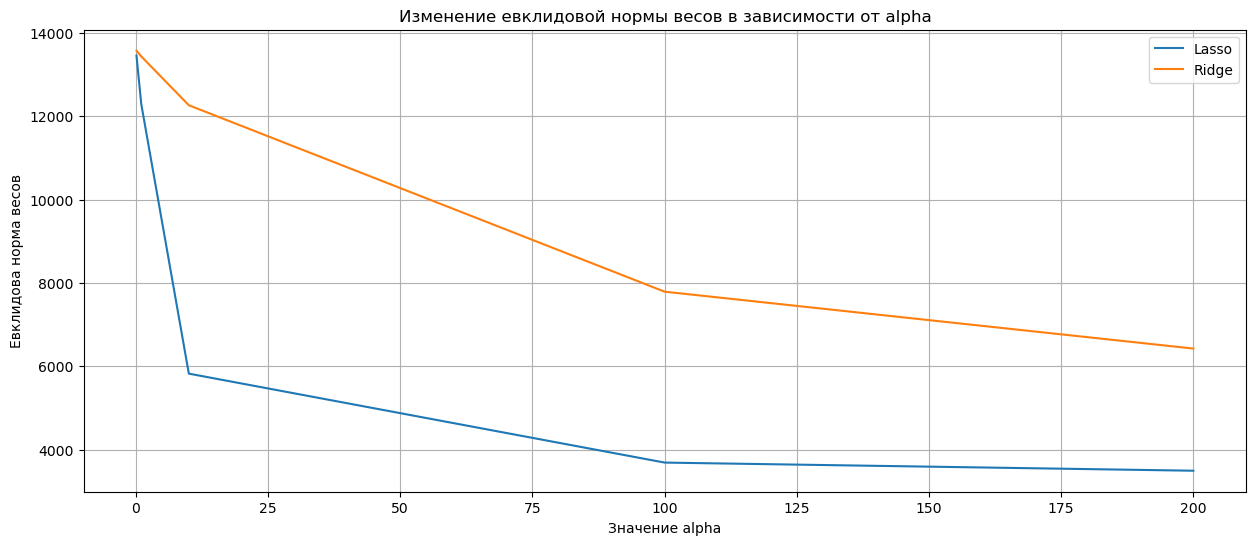

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(table['Alpha'],table['Lasso model'], label='Lasso')
plt.plot(table['Alpha'], table['Ridge model'], label='Ridge')

plt.xlabel('Значение alpha')
plt.ylabel('Евклидова норма весов')
plt.title('Изменение евклидовой нормы весов в зависимости от alpha')
plt.legend()
plt.grid(True)

Сумма весов уменьшается с увеличением параметра регуляризации а:
1) увеличивается штраф на коэффиценты - абсолютное значение весов снижается;

2) веса активнее зануляются, потому что модель отбрасывает неинформативные признаки, с ростом альфы в итоге останется только один коэффицент - карат (вес бриллианта), он и в большинстве случаев в жизни является наиболее значимым фактором, влияющим на цену булыжника.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [ ]:
from sklearn.linear_model import LassoCV

alphas = np.linspace(0.1, 30, 1000)   # отправляемся в этом интервале на поиски альфы
model_lasso = LassoCV(alphas=alphas, cv=5).fit(X_train, y_train)
alphas_order = model_lasso.alphas_    # здесь в разном порядке лежат альфы
mse_matrix = model_lasso.mse_path_    # 5 фолдов - 5 результатов ошибки
mse_sum_axis = np.mean(mse_matrix, axis = 1) # усредняем построчно ошибки
mse_argmin = np.argmin(mse_sum_axis)  # ищем индекс минимальной средней ошибки

print('Минимальное значение α: {}'. format(alphas_order[mse_argmin]))
print("Минимальная ошибка: {}".format(np.min(mse_sum_axis)))

Минимальное значение α: 0.3992992992992993
Минимальная ошибка: 1294502.5608318704


In [ ]:
# model_lasso.alphas_
# coef = pd.Series(model_lasso.coef_, index = X.columns)
# coef

**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [ ]:
alpha = alphas_order[mse_argmin]   # берем α из предыдущего пункта
model_res = Lasso(alpha).fit(X_train, y_train)
lasso_coef_res = model_res.coef_

# добавим веса в специальную табличку, ее выше уже создали
coef.loc[3] = np.hstack((lasso_coef_res[:6], f'lasso α = {alpha}'))
coef

,carat,depth,table,x,y,z,model_type
0,5338.615670614777,-90.17381703342096,-60.332279910271225,-1100.4188500393097,-6.45891672053267,-34.258944620880015,linear
1,4756.602190121012,-153.12271503755693,-109.86857586573196,-681.2753328336609,-0.0,-6.2794389413657665,lasso α = 10
2,5286.285876305112,-93.74631384905919,-63.430105512532315,-1062.0065141700059,-5.916125957021648,-33.689993950592886,ridge α = 10
3,5313.893211595501,-93.76353149292493,-62.92778201800333,-1086.0224134148507,-3.0618988058650767,-33.010403574687714,lasso α = 0.3992992992992993


При α = 0.3992992992992993 нет занулившихся весов, можно считать, что все приведенные выше в табличке непрерывные колонки вносят определенный вес в прогноз цены камешка, но наиболее "существенными" признаками являются все так же "карат" и "х" при небольших альфах (это если речь только о колонках с непрерывными значениями). Далее с ростом параметра регуляризации модели станет трудно разделять влияние этих двух переменных на цену, так как они сильно коррелированы, в итоге "х" - длина камня выродится в 0, постепенно как и другие признаки

После беседы с гпт выяснилось, что в большинстве случаев вес (карат) бриллианта напрямую связан с его размером (характеристики x, y, z), чем больше размер - тем больше будет карат. В большинстве случаев это работает и в обратную сторону. Поэтому модель будет обощать признаки и преимущественно отталкиваться именно от "carat" при прогнозе. Исключением являются редкие маленькие, но очень плотные камни (возможно их так обработали или природа сильно постаралась и он такой с рождения был), в таком случае камень может быть относительно небольшим, но тяжелым.

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [ ]:
y_pr_train_res = model_res.predict(X_train) # делаем предикт с помощью обученной выше модели
y_pr_test_res = model_res.predict(X_test)

print(f'Lasso α = {alpha}')
print("Ошибка на train: {}".format(mean_squared_error(y_train, y_pr_train_res)))
print("Ошибка на test: {}".format(mean_squared_error(y_test, y_pr_test_res)))

print('\nLinear') # это результаты линейной регрессии из п 3.6
print("Ошибка на train: {}".format(mean_squared_error(y_train, pred_train)))
print("Ошибка на test: {}".format(mean_squared_error(y_test, pred_test)))

Lasso α = 0.3992992992992993
Ошибка на train: 1291287.235718753
Ошибка на test: 1243639.1942413577

Linear
Ошибка на train: 1290541.9147450617
Ошибка на test: 1244765.4357158698


В целом очень схожие результаты двух моделей, лассо с найденным параметром на тесте немного лучше, на трейне немного хуже. Если хотим простую модель, то линейная регрессия может быть предпочтительнее. Но можем столкнуться с переобучением из-за большого количества учитываемых признаков. Если нужна точность прогнозирования получше и требуется уменьшение влияния незначимых признаков, то лассо может быть более подходит, данная модель может обобщать данные. У нас получилось, что две модели работают примерно одинаково.

<center>
<img src='https://cs14.pikabu.ru/post_img/2023/04/30/7/og_og_1682854967260964789.jpg'
" height="300">
</center>